<a href="https://colab.research.google.com/github/nguyendoanquangnhat/Fuzzy-Logic/blob/main/FuzzyLogic_EX1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=7dde66cd9bc111281f390fa019eefe5ea3bd4b6708f0e1a3784d5836e00d251d
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


13.333333333333325


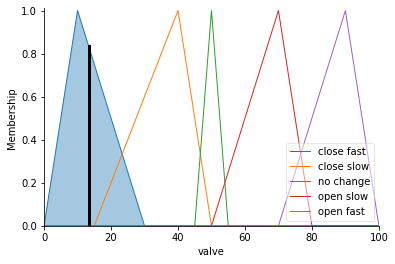

In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl 

level = ctrl.Antecedent(np.arange(0,51,1),'level')
rate = ctrl.Antecedent(np.arange(1,21,1),'rate')
valve = ctrl.Consequent(np.arange(0,101,1),'valve')

level['low'] = fuzz.trimf(level.universe,[0,10,15])
level['okay'] = fuzz.trimf(level.universe,[15,25,35])
level['high'] = fuzz.trimf(level.universe,[35,45,50])

rate['negative'] = fuzz.trimf(rate.universe,[1,5,10])
rate['positive'] = fuzz.trimf(rate.universe,[10,15,20])

valve['close fast'] = fuzz.trimf(valve.universe,[0,10,30])
valve['close slow'] = fuzz.trimf(valve.universe,[15,40,50])
valve['no change'] = fuzz.trimf(valve.universe,[45,50,55])
valve['open slow'] = fuzz.trimf(valve.universe,[50,70,80])
valve['open fast'] = fuzz.trimf(valve.universe,[70,90,100])

rule1 = ctrl.Rule(level['okay'], valve['no change'])
rule2 = ctrl.Rule(level['low'], valve['open fast'])
rule3 = ctrl.Rule(level['high'], valve['close fast'])
rule4 = ctrl.Rule(level['okay'] & rate['positive'], valve['close slow'])
rule5 = ctrl.Rule(level['okay'] & rate['negative'], valve['open slow'])

valvecontrol_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
valvecontrol = ctrl.ControlSystemSimulation(valvecontrol_ctrl)
valvecontrol.input['level'] = 45
valvecontrol.input['rate'] = 15
valvecontrol.compute()
print(valvecontrol.output['valve'])
valve.view(sim=valvecontrol)